El objetivo de este dataset es estudiar las variables cartográficas para poder predecir el tipo de cubierta foresta (Cover_Type), que será nuestra varibale objetivo.

In [1]:
import pandas as pd
import numpy as np
import gzip
print('Done')

Done


In [2]:
# descomprimimos el archivo y creamos un dataframe con los datos que contiene
with gzip.open('data/covtype.data.gz', 'rb') as f:
    df = pd.read_csv(f, delimiter=',')
df.to_csv('data/datos-forestal.csv', index=False)

In [3]:
df.head()

,2596,51,3,258,0,510,221,232,148,6279,...,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,5
0,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
1,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
2,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
3,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
4,2579,132,6,300,-15,67,230,237,140,6031,...,0,0,0,0,0,0,0,0,0,2


# Preparar el dataset

In [4]:
df_0 = df.copy()

## Nombrar columnas

In [5]:
column_names = ['Elevation','Aspect','Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology','Horizontal_Distance_To_Roadways','Hillshade_9am','Hillshade_Noon','Hillshade_3pm','Horizontal_Distance_To_Fire_Points',
                'Wilderness_Area_1','Wilderness_Area_2', 'Wilderness_Area_3', 'Wilderness_Area_4',
                'Soil_Type_1', 'Soil_Type_2', 'Soil_Type_3', 'Soil_Type_4', 'Soil_Type_5', 'Soil_Type_6', 'Soil_Type_7', 'Soil_Type_8', 'Soil_Type_9', 'Soil_Type_10', 'Soil_Type_11', 'Soil_Type_12', 'Soil_Type_13', 'Soil_Type_14', 'Soil_Type_15', 'Soil_Type_16', 'Soil_Type_17', 'Soil_Type_18', 'Soil_Type_19', 'Soil_Type_20',  
                'Soil_Type_21', 'Soil_Type_22', 'Soil_Type_23', 'Soil_Type_24', 'Soil_Type_25', 'Soil_Type_26', 'Soil_Type_27', 'Soil_Type_28', 'Soil_Type_29', 'Soil_Type_30', 'Soil_Type_31', 'Soil_Type_32', 'Soil_Type_33', 'Soil_Type_34', 'Soil_Type_35', 'Soil_Type_36', 'Soil_Type_37', 'Soil_Type_38', 'Soil_Type_39', 'Soil_Type_40',
                'Cover_Type']
df_0.columns = column_names
df_0.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
0,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
1,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
2,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
3,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
4,2579,132,6,300,-15,67,230,237,140,6031,...,0,0,0,0,0,0,0,0,0,2


## Datos nulos

In [6]:
nulos = df_0.isna().sum()
nulos

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area_1                     0
Wilderness_Area_2                     0
Wilderness_Area_3                     0
Wilderness_Area_4                     0
Soil_Type_1                           0
Soil_Type_2                           0
Soil_Type_3                           0
Soil_Type_4                           0
Soil_Type_5                           0
Soil_Type_6                           0
Soil_Type_7                           0
Soil_Type_8                           0
Soil_Type_9                           0
Soil_Type_10                          0
Soil_Type_11                          0


## Eliminar duplicados

In [7]:
duplicate_sum = df_0.duplicated().sum()
if duplicate_sum > 0:
    print(f'Total de filas duplicadas: {duplicate_sum}')
else:
    print('No se encuentran filas duplicadas')

No se encuentran filas duplicadas


## Eliminar columnas constantes o de baja varianza

In [8]:
cte_column = []
for col in df_0:
  if df_0[col].std()==0: # Si la desviación estándar es 0, entonces es una constante
    cte_column.append('{}'.format(col))
  else:
    pass
df_0.drop(cte_column, axis=1, inplace=True)
print('Tamaño del dataset: ', df_0.shape)
print('Columnas constantes: ', len(cte_column))

Tamaño del dataset:  (581011, 55)
Columnas constantes:  0


# EJERCICIO 1
Para conseguir un dataset con una dimensión reducidad, aplica la técnica de **Selección de variables basada en árbol de decisión** mediante las importancias de cada variable (Decision Trees Importances):

- Filtra el tablón para quedarnos solamente con las variables que aglutinan hasta el 95% de la información que se requiere para estimar la variable objetivo.
- random_state=100

In [9]:
df_1 = df_0.copy()
from sklearn.tree import DecisionTreeClassifier

Seleccionar los datos objetivo

In [10]:
X = df_1.drop('Cover_Type', axis=1)
y = df_1['Cover_Type']


# Crear un clasificador de árbol de decisión
tree = DecisionTreeClassifier(random_state=100)
tree.fit(X, y)


DecisionTreeClassifier(random_state=100)

Creamos un dataframe con la importancia de cada variable, y lo aordenamos por importancia cumulada, quedándonos sólo con los que estén por encima del 95%.

In [11]:
importancias = tree.feature_importances_
df_imp = pd.DataFrame({'Variable': X.columns, 'Importancia': importancias})
df_imp = df_imp.sort_values(by='Importancia', ascending=False)
df_imp['Imp_Acumulada'] = df_imp['Importancia'].cumsum()

variables_importantes = df_imp[df_imp['Imp_Acumulada'] <= 0.95]['Variable']
variables_importantes

0                              Elevation
5        Horizontal_Distance_To_Roadways
9     Horizontal_Distance_To_Fire_Points
3       Horizontal_Distance_To_Hydrology
4         Vertical_Distance_To_Hydrology
7                         Hillshade_Noon
6                          Hillshade_9am
1                                 Aspect
8                          Hillshade_3pm
2                                  Slope
12                     Wilderness_Area_3
45                          Soil_Type_32
17                           Soil_Type_4
15                           Soil_Type_2
36                          Soil_Type_23
10                     Wilderness_Area_1
35                          Soil_Type_22
42                          Soil_Type_29
Name: Variable, dtype: object

In [30]:
print('Número de variables relevantes:', len(variables_importantes))

Número de variables relevantes: 18


In [32]:
# dejamos sólo las variables importantes en el dataframe
variables_importantes = [v for v in variables_importantes if v in df_1.columns]
variables_importantes.append('Cover_Type') #añadimos la variable objetivo también
df_1_reducido = df_1[variables_importantes]
df_1_reducido.head()

,Elevation,Horizontal_Distance_To_Roadways,Horizontal_Distance_To_Fire_Points,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Hillshade_Noon,Hillshade_9am,Aspect,Hillshade_3pm,Slope,Wilderness_Area_3,Soil_Type_32,Soil_Type_4,Soil_Type_2,Soil_Type_23,Wilderness_Area_1,Soil_Type_22,Soil_Type_29,Cover_Type
0,2590,390,6225,212,-6,235,220,56,151,2,0,0,0,0,0,1,0,1,5
1,2804,3180,6121,268,65,238,234,139,135,9,0,0,0,0,0,1,0,0,2
2,2785,3090,6211,242,118,238,238,155,122,18,0,0,0,0,0,1,0,0,2
3,2595,391,6172,153,-1,234,220,45,150,2,0,0,0,0,0,1,0,1,5
4,2579,67,6031,300,-15,237,230,132,140,6,0,0,0,0,0,1,0,1,2


# EJERCICIO 2

In [33]:
df_2 = df_1_reducido.copy()
import matplotlib.pyplot as plt
import seaborn as sns
print('Done')

Done


## 2.1 Gráfica
Genera una gráfica para visualizar la distribución de las variables del datset en conjunto. Analiza dicha gráfica y explica si hay una necesidad de normalizar los datos.



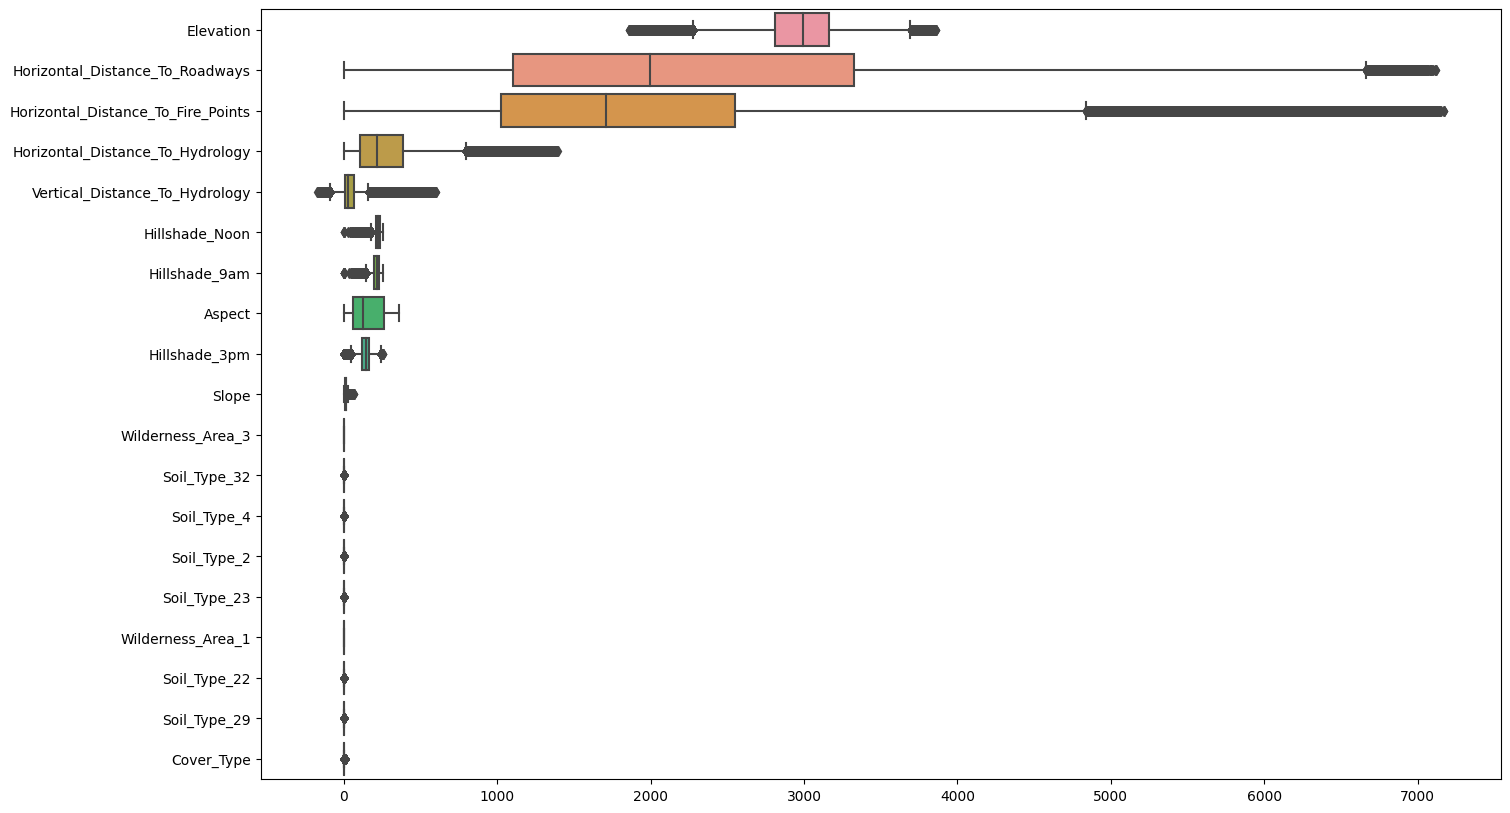

In [34]:
plt.figure(figsize=(16,10))
sns.boxplot(data=df_2, orient="h")
plt.show()

Sería recomienda normalizar los datos porque las variables tienen escalas muy diferentes.

## 2.2 Normalizar

Antes de normalizar, vamos a deshacernos de las variables no continuas (Wilderness_Area y Soil_Type), y a quitar, momentáneamente la variable objetivo Cover_Type.

In [47]:
df_2.columns

Index(['Elevation', 'Horizontal_Distance_To_Roadways',
       'Horizontal_Distance_To_Fire_Points',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Hillshade_Noon', 'Hillshade_9am', 'Aspect', 'Hillshade_3pm', 'Slope',
       'Wilderness_Area_3', 'Soil_Type_32', 'Soil_Type_4', 'Soil_Type_2',
       'Soil_Type_23', 'Wilderness_Area_1', 'Soil_Type_22', 'Soil_Type_29',
       'Cover_Type'],
      dtype='object')

In [51]:
# quitar variables dicretas
df_2_cont = df_2.drop(['Wilderness_Area_3', 'Soil_Type_32', 'Soil_Type_4', 'Soil_Type_2', 'Soil_Type_23', 'Wilderness_Area_1', 'Soil_Type_22', 'Soil_Type_29','Cover_Type'], axis=1)
df_2_cont.head()

,Elevation,Horizontal_Distance_To_Roadways,Horizontal_Distance_To_Fire_Points,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Hillshade_Noon,Hillshade_9am,Aspect,Hillshade_3pm,Slope
0,2590,390,6225,212,-6,235,220,56,151,2
1,2804,3180,6121,268,65,238,234,139,135,9
2,2785,3090,6211,242,118,238,238,155,122,18
3,2595,391,6172,153,-1,234,220,45,150,2
4,2579,67,6031,300,-15,237,230,132,140,6


In [53]:
from sklearn.preprocessing import MinMaxScaler # usaremos el escalador MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(df_2_cont)
df_2_normal = pd.DataFrame(X_scaled, columns=df_2_cont.columns)
df_2_normal.head()

,Elevation,Horizontal_Distance_To_Roadways,Horizontal_Distance_To_Fire_Points,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Hillshade_Noon,Hillshade_9am,Aspect,Hillshade_3pm,Slope
0,0.365683,0.054798,0.867838,0.151754,0.215762,0.925197,0.866142,0.155556,0.594488,0.030303
1,0.472736,0.446817,0.853339,0.191840,0.307494,0.937008,0.921260,0.386111,0.531496,0.136364
2,0.463232,0.434172,0.865886,0.173228,0.375969,0.937008,0.937008,0.430556,0.480315,0.272727
3,0.368184,0.054939,0.860449,0.109520,0.222222,0.921260,0.866142,0.125000,0.590551,0.030303
4,0.360180,0.009414,0.840792,0.214746,0.204134,0.933071,0.905512,0.366667,0.551181,0.090909


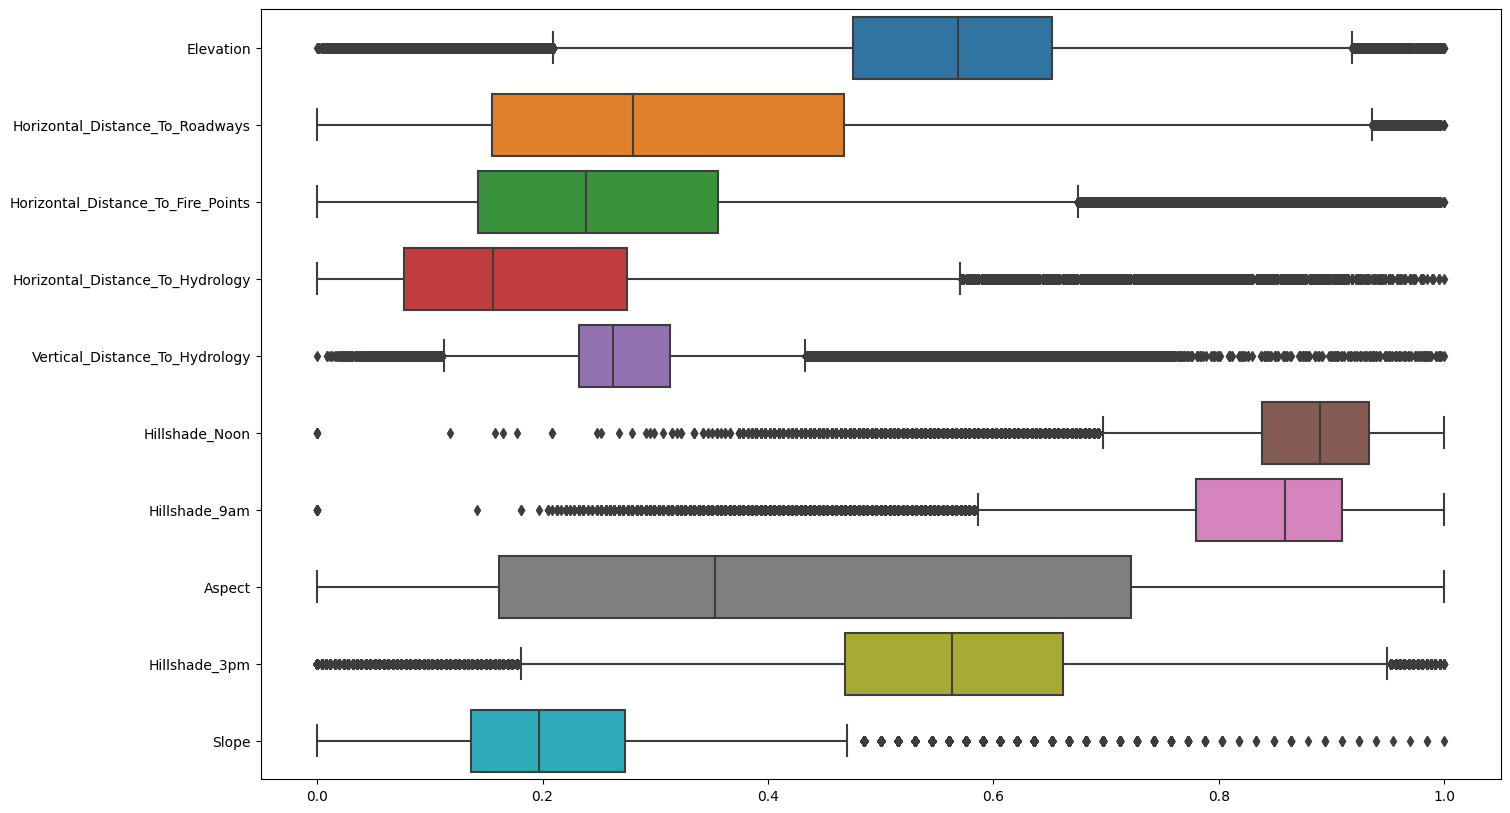

In [54]:
# y lo representamos
plt.figure(figsize=(16,10))
sns.boxplot(data=df_2_normal, orient="h")
plt.show()

In [55]:
# y volvemos a añadir la variable objetivo Cover_Type
df_2_normal['Cover_Type'] = df_2['Cover_Type']
df_2_normal.head()

,Elevation,Horizontal_Distance_To_Roadways,Horizontal_Distance_To_Fire_Points,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Hillshade_Noon,Hillshade_9am,Aspect,Hillshade_3pm,Slope,Cover_Type
0,0.365683,0.054798,0.867838,0.151754,0.215762,0.925197,0.866142,0.155556,0.594488,0.030303,5
1,0.472736,0.446817,0.853339,0.191840,0.307494,0.937008,0.921260,0.386111,0.531496,0.136364,2
2,0.463232,0.434172,0.865886,0.173228,0.375969,0.937008,0.937008,0.430556,0.480315,0.272727,2
3,0.368184,0.054939,0.860449,0.109520,0.222222,0.921260,0.866142,0.125000,0.590551,0.030303,5
4,0.360180,0.009414,0.840792,0.214746,0.204134,0.933071,0.905512,0.366667,0.551181,0.090909,2


# EJERCICIO 3: Regresión Lógística
Crear el primer clasificador


In [56]:
df_3 = df_2_normal.copy()
from sklearn.model_selection import train_test_split

## 3.1 Dividir datos en training y en test:
- Guarda el 20% de los datos para testeo.
- random_state=100


In [57]:
X = df_3.drop(columns=['Cover_Type'])
y = df_3['Cover_Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

## 3.2 Entrenar Modelo de Regresión Logística:
- Número máximo de iteraciones igual a 1000
- random_state=100


In [60]:
from sklearn.linear_model import LogisticRegression
modelo = LogisticRegression(max_iter= 1000, random_state=100)
modelo

LogisticRegression(max_iter=1000, random_state=100)

In [61]:
# entrenarlo
modelo.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=100)

## 3.3 Análisis Rendimiento
- Accuracy
- F1-score (average='weighted')
- Classification report (zero_division=0)
- Confusion matrix

In [69]:
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# predicciones en base a X_test
y_pred = modelo.predict(X_test)

In [80]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {round(accuracy*100, 2)}%")

Accuracy: 69.45%


In [65]:
# F1-score
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
print("F1-score:", f1)

F1-score: 0.6782225048024904


In [66]:
# Classification report
class_report = classification_report(y_test, y_pred, zero_division=0)
print("Classification report:")
print(class_report)

Classification report:
              precision    recall  f1-score   support

           1       0.68      0.70      0.69     42680
           2       0.73      0.79      0.76     56417
           3       0.62      0.69      0.66      7136
           4       0.66      0.13      0.21       578
           5       0.00      0.00      0.00      1873
           6       0.38      0.14      0.21      3400
           7       0.57      0.22      0.32      4119

    accuracy                           0.69    116203
   macro avg       0.52      0.38      0.41    116203
weighted avg       0.67      0.69      0.68    116203



en general la media de precisión no es mala, pero hay variables con muy baja precisión.

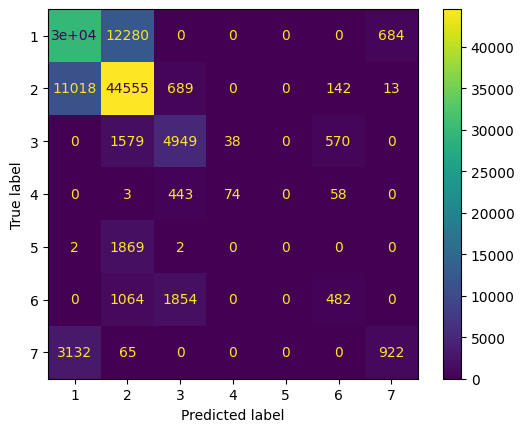

In [70]:
# Confusion matrix
matriz_conf = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred), display_labels=modelo.classes_)
matriz_conf.plot()

plt.show()

# EJERCICIO 4: Árboles Decisión
Modelo basados en árboles de decisión

## 4.1 Decision Tree Classifire
Entrena un modelo tipo Decision Tree Classifire y calcula las métricas correspondientes para analizar su rendimiento en comparación con el modelo anterior:

- random_state=100
- Accuracy
- F1-score (average='weighted')
- Classification report (zero_division=0)

In [72]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
df_4 = df_3.copy()
print('Done')

Done


In [76]:
modelo2 = DecisionTreeClassifier(random_state=100)
modelo2.fit(X_train, y_train)
y_pred_2 = modelo2.predict(X_test)

In [81]:
accuracy_2 = accuracy_score(y_test, y_pred_2)
print(f"Accuracy: {round(accuracy_2*100, 2)}%")

f1_2 = f1_score(y_test, y_pred_2, average='weighted')
print("F1-score:", f1_2)

classification_2 = classification_report(y_test, y_pred_2, zero_division=0)
print("Classification report:")
print(classification_2)

Accuracy: 91.96%
F1-score: 0.919636122762558
Classification report:
              precision    recall  f1-score   support

           1       0.92      0.92      0.92     42680
           2       0.93      0.93      0.93     56417
           3       0.90      0.89      0.90      7136
           4       0.80      0.80      0.80       578
           5       0.79      0.79      0.79      1873
           6       0.82      0.83      0.83      3400
           7       0.93      0.93      0.93      4119

    accuracy                           0.92    116203
   macro avg       0.87      0.87      0.87    116203
weighted avg       0.92      0.92      0.92    116203



## 4.2 Curva Complejidad
Saca la curva de complejidad del modelo Decision Tree (Model Complexity Curve) y crea un nuevo clasificador con el valor óptimo de la profundidad del árbol según esta gráfica. Después saca las métricas correspondiente y analiza el rendimiento del modelo en comparación de los anteriores.

- random_state=100
- rango de profundidades: de 2 a 30 inclusive

In [85]:
from sklearn.model_selection import validation_curve

In [86]:
rango_profund = range(2, 31)  #rango profundidad del arbol

# Entrenar y evaluar el modelo con diferentes profundidades
train_scores, test_scores = validation_curve( DecisionTreeClassifier(random_state=100),
    X_train, y_train, param_name='max_depth', param_range=rango_profund, scoring='accuracy', n_jobs=-1)

# Cálculos media y desviación típica
train_mean = np.mean(train_scores, axis=1) # de lso datos entrenados
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1) # de los datos de test
test_std = np.std(test_scores, axis=1)

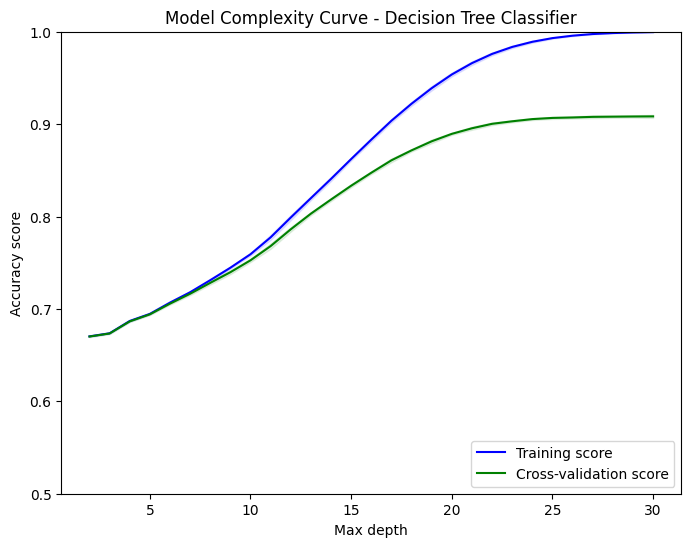

In [87]:
# Representación gráfica
plt.figure(figsize=(8, 6))
plt.title('Model Complexity Curve - Decision Tree Classifier')
plt.plot(rango_profund, train_mean, label='Training score', color='blue')
plt.fill_between(rango_profund, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
plt.plot(rango_profund, test_mean, label='Cross-validation score', color='green')
plt.fill_between(rango_profund, test_mean - test_std, test_mean + test_std, alpha=0.1, color='green')
plt.xlabel('Max depth')
plt.ylabel('Accuracy score')
plt.legend(loc='lower right')
plt.ylim([0.5, 1.0])
plt.show()

## 4.3 Learning Curve
Saca la gráfica de el Learning Curve para estos modelos, definiendo y aplicando una función que toma el valor del hiperparámetro como su entrada y dibuja la evolución del rendimiento del modelo para el conjunto de training y de test. Explica si este último modelo tiene preferencia o no, comparando con modelos anteriores.

- random_state=100
- (Sugerencia: No incluya más de 10 puntos en el eje horizontal y empieza la gráfica con un mínimo de 1000 muestras para el modelo)

In [90]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(modelo, X, y, train_sizes=None, cv=None, scoring='accuracy'):
    train_sizes, train_scores, test_scores = learning_curve(modelo, X, y, train_sizes=train_sizes, cv=cv, scoring=scoring)
    
    # media, desviacion datos
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Representación gráfica
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1,
                     color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.legend(loc="best")

    return plt

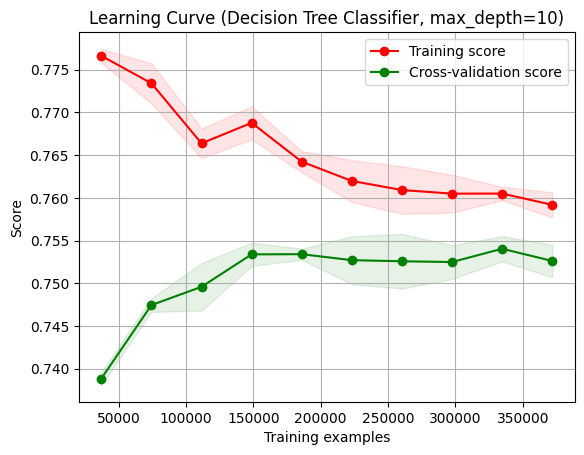

In [91]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth=10, random_state=100)
plot_learning_curve(dtc, X_train, y_train, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))
plt.title("Learning Curve (Decision Tree Classifier, max_depth=10)")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.show()

# EJERCICIO 5: Bosques Aleatorios
Ahora probamos la creación de otros modelo basados en bosques aleatorios:

5.1 Entrena un modelo tipo Random Forest Classifire y calcula las métricas correspondientes para analizar su rendimiento en comparación con los modelos anteriores:

random_state=100


5.2 Consulta la profundidad de todos los árboles del bosque creado en el paso anterior y calcula la mediana de este parámetro.



5.3 Saca las curvas de complejidad del modelo Random Forest (Model Complexity Curve) y crea un nuevo clasificador con los valores óptimos analizados dentro de los rangos indicados para cada hiperparámeto. Después crea un modelo con estos parámetros "óptimos" y saca las métricas correspondientes para analizar el rendimiento del modelo en comparación con los anteriores.

random_state=100
define un rango con funciones de numpy para considerar estos números de árboles: [200, 250, 300, 350, 400]
rango de profundidades: de 20 a 40 inclusive en pasos de 2 en 2.
considera estas opciones para max_features : ["auto", "log2", None]
Accuracy
F1-score (average='weighted')
Classification report (zero_division=0)
OOB (out-of-bag score)
5.4 Saca la gráfica del Learning Curve para estos modelos, definiendo y aplicando una función que toma el valor de los hiperparámetros analizados como su entrada y dibuja la evolución del rendimiento del modelo para el conjunto de training y de test. Explica si este último modelo tiene preferencia o no, comparando con modelos anteriores.

random_state=100
(Sugerencia: No incluya más de 10 puntos en el eje horizontal y empieza la gráfica con un mínimo de 1000 muestras para el modelo)